In [1]:
%run C:\Users\HSS\dd.py

# PCA

\begin{align}
\arg\min_{W} || X - X W^{T} W ||^2
\end{align}

- X와 X\`\`의 차를 최소화하는 W벡터 찾기 문제 = K차원 근사 문제


## Iris로 W,X,X\`,X\`\` 이해하기 

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 10 송이의 sepal length와 sepal width의 그래프

In [16]:
X = iris.data[:10,:2]

In [18]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [19]:
X.T

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1]])

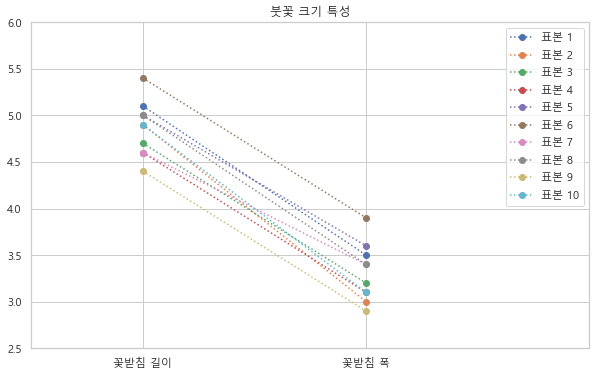

In [41]:
plt.figure(figsize = (10,6))
plt.plot(X.T, 'o:')
plt.xticks(range(2), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(10)])
plt.show()

### 꽃받침 길이와 꽃받침 폭의 선형 관계

In [49]:
 X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [50]:
WUX

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

### PCA를 통해 구한 벡터 W는 정말로 SVD의 우특이벡터와 같을까?

In [ ]:
from numpy.linalg import svd
U,S,VT = svd(X - np.mean(X,axis = 0)) #PCA는 X평균제거를 사용하기 때문에 svd(X-m)를 했다.

In [72]:
VT[0]

array([-0.68305029, -0.73037134])

In [73]:
W

array([[0.68305029, 0.73037134]])

In [93]:
WX

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [94]:
WX2 = (X - np.mean(X,axis = 0))@W.T

In [98]:
WX2

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [99]:
WX

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [100]:
WUX

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

In [102]:
W.shape

(1, 2)

In [109]:
WX2

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

array([[1.]])

In [2]:
from sklearn.datasets import fetch_olivetti_faces

In [3]:
faces_all = fetch_olivetti_faces()

In [4]:
K = 20

In [5]:
faces = faces_all.images[faces_all.target == K]

In [6]:
N = 2
M = 5


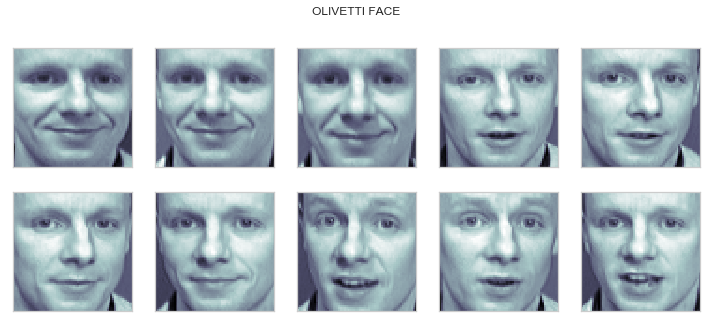

In [7]:
fig = plt.figure(figsize = (10,5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i*M + j
        ax = fig.add_subplot(N,M,k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
plt.suptitle("OLIVETTI FACE")
plt.tight_layout()
plt.show()

In [8]:
from sklearn.decomposition import PCA
pca2 = PCA(2)
X2 = faces_all.data[faces_all.target == K]
W2 = pca2.fit_transform(X2)
X22 = pca2.inverse_transform(W2)

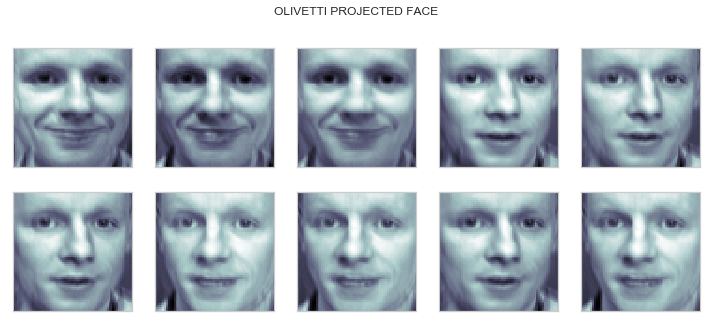

In [9]:
fig = plt.figure(figsize = (10,5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i*M + j
        ax = fig.add_subplot(N,M,k+1)
        ax.imshow(X22[k].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
plt.suptitle("OLIVETTI PROJECTED FACE")
plt.tight_layout()
plt.show()

In [10]:
X2.shape

(10, 4096)

In [11]:
W2.shape

(10, 2)

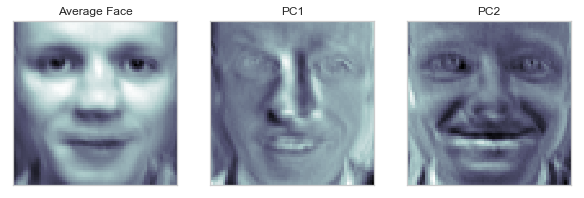

In [12]:
face_mean = pca2.mean_.reshape(64, 64)
face_p1 = pca2.components_[0].reshape(64, 64)
face_p2 = pca2.components_[1].reshape(64, 64)
fig = plt.figure(figsize = (10,5))
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("Average Face")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("PC1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("PC2")
plt.show()


In [13]:
def make_face_with_pc1(face_mean,face_p):
    face_p1 = face_p
    N = 2
    M = 5
    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    for i in range(N):
        for j in range(M):
            k = i * M + j
            ax = fig.add_subplot(N, M, k+1)
            w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
            ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            plt.title("{} weighted PC1".format(w))
    plt.suptitle("Mean Face Added with PC1 face")
    plt.tight_layout()
    plt.show()

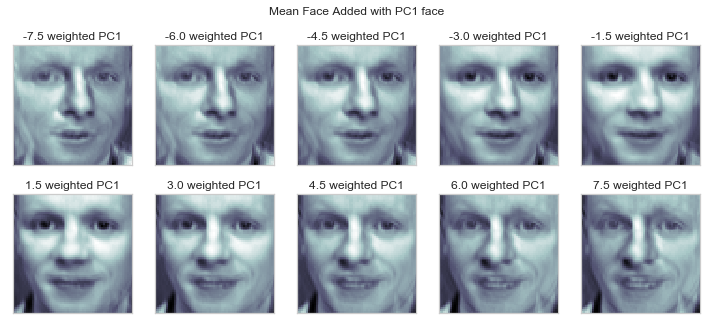

In [14]:
make_face_with_pc1(face_mean,face_p1)

In [15]:
def make_face_with_pc2(face_mean,face_p):
    face_p2 = face_p
    N = 2
    M = 5
    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    for i in range(N):
        for j in range(M):
            k = i * M + j
            ax = fig.add_subplot(N, M, k+1)
            w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
            ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            plt.title("{} weighted PC2".format(w))
    plt.suptitle("Mean face added with PC2 face")
    plt.tight_layout()
    plt.show()

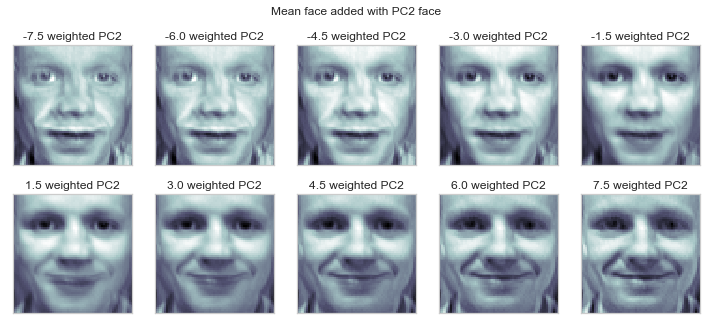

In [16]:
make_face_with_pc2(face_mean,face_p2)

In [17]:
#다른 사람의 성분 알아보기

In [18]:
def make2face(k):
    pca2 = PCA(2)
    X2 = faces_all.data[faces_all.target == k]
    W2 = pca2.fit_transform(X2)
    X22 = pca2.inverse_transform(W2)
    face_mean = pca2.mean_.reshape(64, 64)
    face_p1 = pca2.components_[0].reshape(64, 64)
    face_p2 = pca2.components_[1].reshape(64, 64)
    return face_p1,face_p2

In [19]:
face_p1, face_p2 = make2face(12)

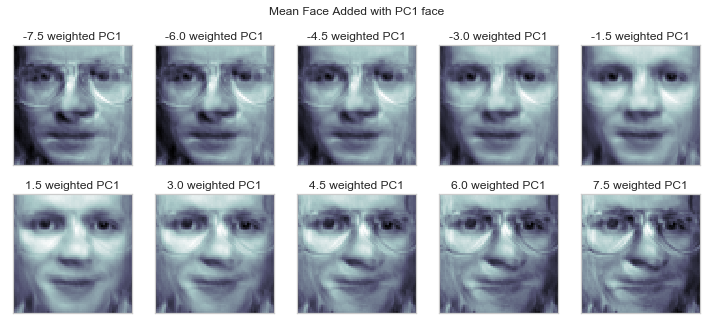

In [20]:
make_face_with_pc1(face_mean,face_p1)

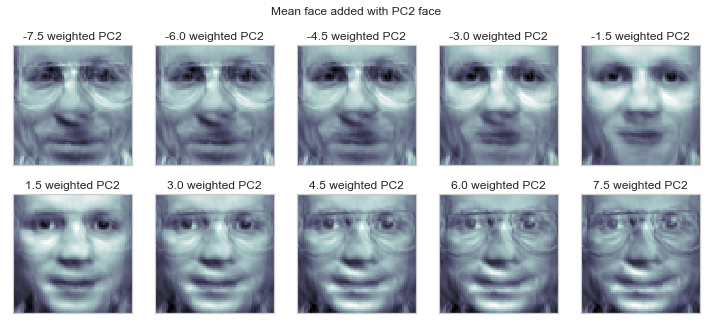

In [21]:
make_face_with_pc2(face_mean,face_p2)